In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.reset_defaults()

In [2]:
def bench(n=2**20, q=2**20, source='std'):
    !make -s {source}
    if _exit_code != 0:
        raise Exception("Compilation failed")
    res = !./{source} {n} {q}
    #res = !g++ -O3 -march=native -D N={n} -D Q={q} {source} -o run && ./run
    duration = float(res[0].split()[0])
    check = int(res[1])
    print(f'{source:>18} {n:<7} {q:<7} {check:10} {duration}')
    return duration

ns = list(int(1.17**k) for k in range(30, 60))

In [3]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', base=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [4]:
bench(source='textbook', n=2**24)
bench(source='branchless', n=2**24)
bench(source='branchless-prefetch', n=2**24)
bench(source='branchless-drop-in', n=2**24)

          textbook 16777216 1048576 1448891158 546.01
        branchless 16777216 1048576 1448891158 594.37
branchless-prefetch 16777216 1048576 1448891158 388.31
branchless-drop-in 16777216 1048576 1448891158 500.87


500.87

In [5]:
bench(source='branchless-drop-in', n=2**12)

branchless-drop-in 4096    1048576 1600616319 58.36


58.36

In [6]:
[bench(source=source, n=2**12) for source in ['textbook', 'branchless', 'branchless-drop-in']]

          textbook 4096    1048576 1600616319 58.39
        branchless 4096    1048576 1600616319 12.8
branchless-drop-in 4096    1048576 1600616319 57.71


[58.39, 12.8, 57.71]

In [7]:
x = [bench(source='eytzinger', n=n, q=2**22) for n in ns]

         eytzinger 111     4194304 1067433874 10.63
         eytzinger 129     4194304 2084202863 8.82
         eytzinger 152     4194304 1650086489 13.64
         eytzinger 177     4194304 1093987052 14.66
         eytzinger 208     4194304  849577987 11.35
         eytzinger 243     4194304 1842022031 9.84
         eytzinger 284     4194304   24170984 12.65
         eytzinger 333     4194304 1064724685 17.14
         eytzinger 389     4194304 1049421536 15.44
         eytzinger 456     4194304 1677787291 12.7
         eytzinger 533     4194304 1381557454 13.03
         eytzinger 624     4194304  485950239 18.19
         eytzinger 730     4194304 1743435292 18.14
         eytzinger 855     4194304 1980389118 15.73
         eytzinger 1000    4194304  929098415 14.05
         eytzinger 1170    4194304 1814983758 16.49
         eytzinger 1369    4194304  683804919 21.09
         eytzinger 1602    4194304  231941320 18.26
         eytzinger 1874    4194304  926717548 14.88
         eytzin

In [8]:
y = [bench(source='eytzinger-last', n=n, q=2**22) for n in ns]

    eytzinger-last 111     4194304 1067433874 7.74
    eytzinger-last 129     4194304 2084202863 8.78
    eytzinger-last 152     4194304 1650086489 8.79
    eytzinger-last 177     4194304 1093987052 8.69
    eytzinger-last 208     4194304  849577987 8.75
    eytzinger-last 243     4194304 1842022031 9.14
    eytzinger-last 284     4194304   24170984 10.4
    eytzinger-last 333     4194304 1064724685 10.16
    eytzinger-last 389     4194304 1049421536 10.3
    eytzinger-last 456     4194304 1677787291 10.51
    eytzinger-last 533     4194304 1381557454 12.14
    eytzinger-last 624     4194304  485950239 12.5
    eytzinger-last 730     4194304 1743435292 12.05
    eytzinger-last 855     4194304 1980389118 11.86
    eytzinger-last 1000    4194304  929098415 11.92
    eytzinger-last 1170    4194304 1814983758 13.32
    eytzinger-last 1369    4194304  683804919 13.18
    eytzinger-last 1602    4194304  231941320 13.38
    eytzinger-last 1874    4194304  926717548 13.35
    eytzinger-last 21

In [9]:
z = [bench(source='eytzinger-fill', n=n, q=2**22) for n in ns]

    eytzinger-fill 111     4194304 1067433874 8.11
    eytzinger-fill 129     4194304 2084202863 10.94
    eytzinger-fill 152     4194304 1650086489 9.38
    eytzinger-fill 177     4194304 1093987052 9.25
    eytzinger-fill 208     4194304  849577987 9.48
    eytzinger-fill 243     4194304 1842022031 9.24
    eytzinger-fill 284     4194304   24170984 10.75
    eytzinger-fill 333     4194304 1064724685 10.76
    eytzinger-fill 389     4194304 1049421536 11.1
    eytzinger-fill 456     4194304 1677787291 11.05
    eytzinger-fill 533     4194304 1381557454 13.21
    eytzinger-fill 624     4194304  485950239 14.78
    eytzinger-fill 730     4194304 1743435292 12.75
    eytzinger-fill 855     4194304 1980389118 12.67
    eytzinger-fill 1000    4194304  929098415 13.95
    eytzinger-fill 1170    4194304 1814983758 14.02
    eytzinger-fill 1369    4194304  683804919 14.03
    eytzinger-fill 1602    4194304  231941320 14.26
    eytzinger-fill 1874    4194304  926717548 13.82
    eytzinger-fill

In [10]:
mini_std = [bench(source='std', n=n, q=2**22) for n in ns]
mini_branchless = [bench(source='branchless', n=n, q=2**22) for n in ns]

               std 111     4194304 1067433874 22.87
               std 129     4194304 2084202863 24.5
               std 152     4194304 1650086489 25.41
               std 177     4194304 1093987052 26.91
               std 208     4194304  849577987 27.38
               std 243     4194304 1842022031 30.05
               std 284     4194304   24170984 31.19
               std 333     4194304 1064724685 30.93
               std 389     4194304 1049421536 32.52
               std 456     4194304 1677787291 34.73
               std 533     4194304 1381557454 36.4
               std 624     4194304  485950239 37.37
               std 730     4194304 1743435292 36.85
               std 855     4194304 1980389118 38.46
               std 1000    4194304  929098415 41.15
               std 1170    4194304 1814983758 44.68
               std 1369    4194304  683804919 43.22
               std 1602    4194304  231941320 44.46
               std 1874    4194304  926717548 46.2
               

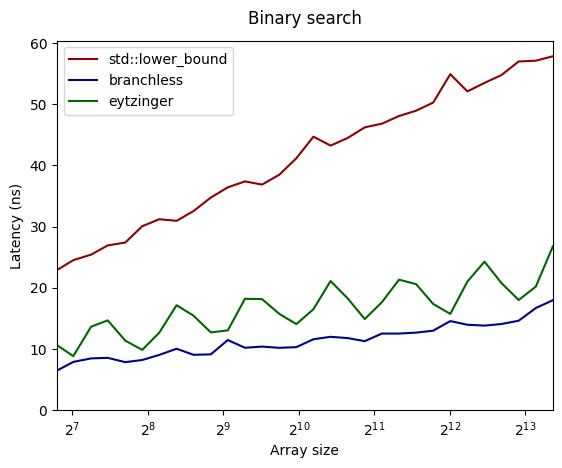

In [11]:
plt.plot(ns, mini_std, color='darkred', label='std::lower_bound')
plt.plot(ns, mini_branchless, color='darkblue', label='branchless')
plt.plot(ns, x, color='darkgreen', label='eytzinger')

plot('Binary search', 'Latency (ns)', path='bumps.svg', legend=True)

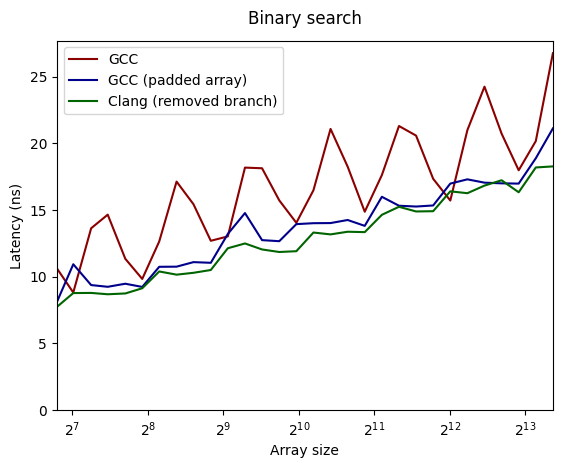

In [12]:
plt.plot(ns, x, color='darkred', label='GCC')
plt.plot(ns, z, color='darkblue', label='GCC (padded array)')
plt.plot(ns, y, color='darkgreen', label='Clang (removed branch)')

plot('Binary search', 'Latency (ns)', path='branchless-eytzinger.svg', legend=True)

In [13]:
# bench(source='btree', n=2**23, q=2**22)
# bench(source='btree-hugepages', n=2**23, q=2**22)

             btree 8388608 4194304  778587145 84.1
   btree-hugepages 8388608 4194304  778587145 77.17


77.17

In [14]:
#bench(n=2**10, q=2**22, source='std')
#bench(n=2**10, q=2**22, source='textbook')
bench(n=2**10, q=2**22, source='branchless')
# bench(n=2**10, q=2**22, source='btree-hugepages')
# bench(n=2**10, q=2**22, source='btree-unrolled')

        branchless 1024    4194304 1732687167 10.36


10.36

In [15]:
def plot(title=None, ylabel=None, path=None, ch=None, legend=False, ylim=None):
    if ch:
        lines = [
            (2**13, "32K"),
            (2**17, "512K"),
            (2**20, "4M"),
        ]

        for x, t in lines:
            #plt.text(x * 1.2, ch, t)
            plt.axvline(x=x, color='black', linestyle='--')

    plt.xscale('log', base=2)
    plt.xlabel('Array size')

    if ylabel:
        plt.ylabel(ylabel)

    if title:
        plt.title(title, pad=12)

    if legend:
        plt.legend(loc='best')

    plt.ylim(bottom=0, top=ylim)
    plt.margins(0)

    if path:
        fig = plt.gcf()
        fig.savefig(path)
    plt.show()


#plt.plot(ns, inc_res, color='darkred')
#plot('for (int i = 0; i < n; i++) a[i]++', 'Increments per second ($10^9$)', 'inc.svg', 4.7)

In [16]:
tasks = [
    # source, name, color
    ('std', 'std::lower_bound', 'darkred'),
    ('branchless', 'branchless', 'darkblue'),
    ('eytzinger', 'eytzinger', 'darkgreen'),
    ('eytzinger-prefetch', 'eytzinger (with prefetching)', 'orange'),
    ('eytzinger-fill','eytzinger (fixed number of iterations)', 'purple')
    # ('btree', 'B-tree (with SIMD)', 'purple'),
    # ('btree-hugepages', 'B-tree (with SIMD and huge pages)', 'cyan'),
]

#ns = [2**14, 2**15]
ns = list(int(1.17**k) for k in range(30, 105))

results = [
    [bench(n=n, q=2**22, source=source) for n in ns]
    for source, _, _ in tasks
]

               std 111     4194304 1067433874 23.57
               std 129     4194304 2084202863 24.42
               std 152     4194304 1650086489 25.53
               std 177     4194304 1093987052 26.14
               std 208     4194304  849577987 27.82
               std 243     4194304 1842022031 29.94
               std 284     4194304   24170984 31.09
               std 333     4194304 1064724685 31.76
               std 389     4194304 1049421536 32.21
               std 456     4194304 1677787291 35.83
               std 533     4194304 1381557454 36.87
               std 624     4194304  485950239 36.5
               std 730     4194304 1743435292 36.72
               std 855     4194304 1980389118 39.22
               std 1000    4194304  929098415 40.51
               std 1170    4194304 1814983758 42.39
               std 1369    4194304  683804919 42.86
               std 1602    4194304  231941320 44.41
               std 1874    4194304  926717548 45.97
             

In [17]:
import pickle

with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

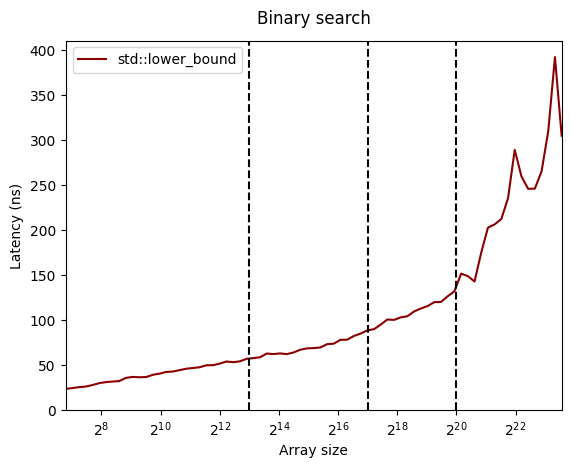

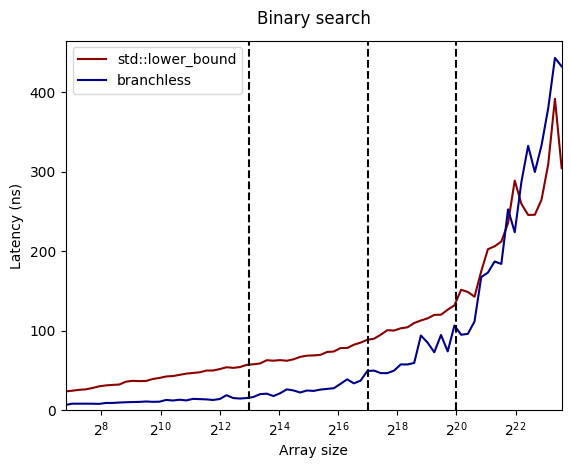

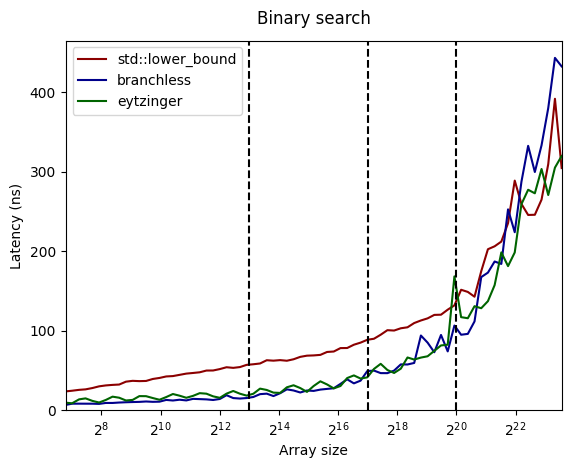

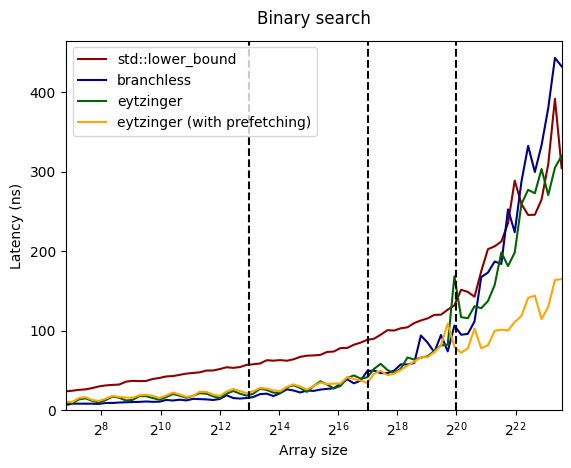

In [18]:
for i, current in enumerate(tasks):
    for (source, name, color), latencies in list(zip(tasks, results))[:i + 1]:
        plt.plot(ns, latencies, color=color, label=name)
    
    plot('Binary search', 'Latency (ns)', current[0] + '.svg', 1, legend=True)